<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/wine_quality_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
for x in data.columns:
  print(x)
  print("unique values are")
  print(data[x].unique())
  print("no of unique values",data[x].nunique())
  print("value counts")
  print(data[x].value_counts())
  print()

fixed acidity
unique values are
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
no of unique values 96
value counts
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64

volatile acidity
unique values are
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
discrete=data.select_dtypes(include="int64")
discrete.columns

Index(['quality'], dtype='object')

In [ ]:
continuous=data.select_dtypes(include="float64")
continuous.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

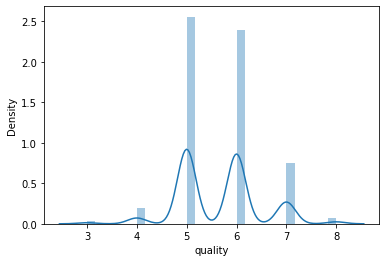

In [ ]:
sns.distplot(data['quality'])

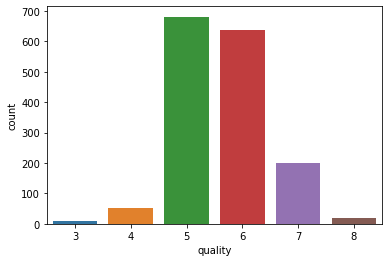

In [ ]:
sns.countplot(data['quality'])

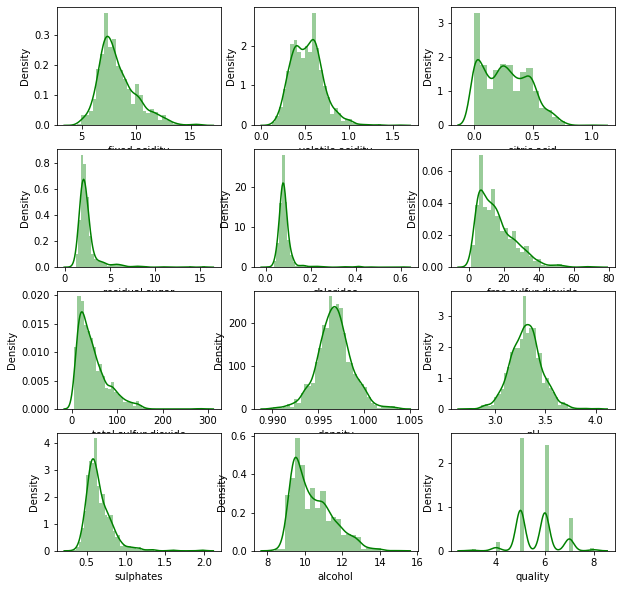

In [ ]:

L=[4,3,1]
a,b,c=L
fig=plt.figure(figsize=(10,10))
for x in data:
  plt.subplot(a,b,c)
  sns.distplot(data[x],color="green")
  c=c+1


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

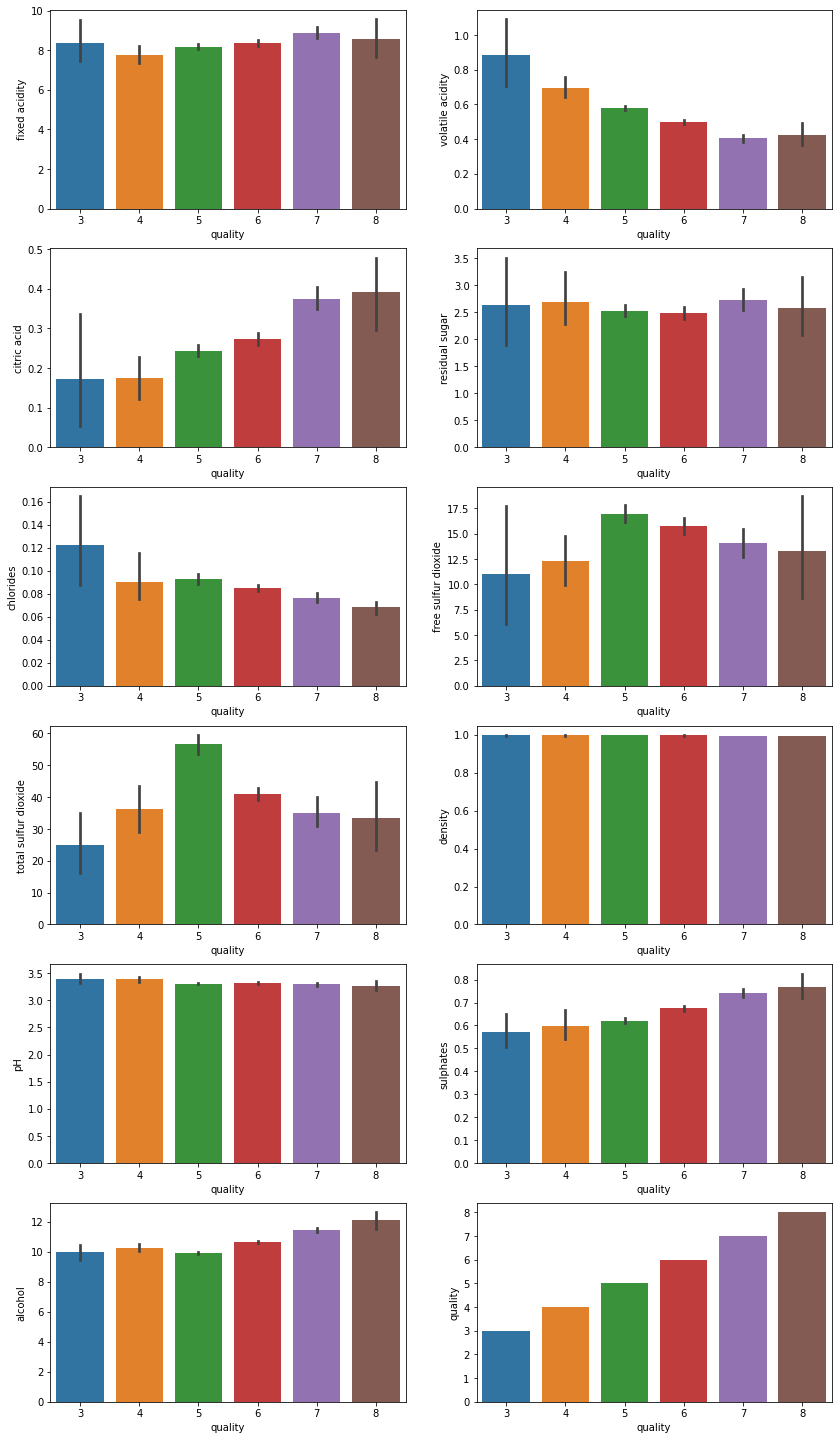

In [ ]:
L=[7,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,30))

for x in data:
  plt.subplot(a,b,c)
  sns.barplot(data['quality'],data[x])
  
  c=c+1

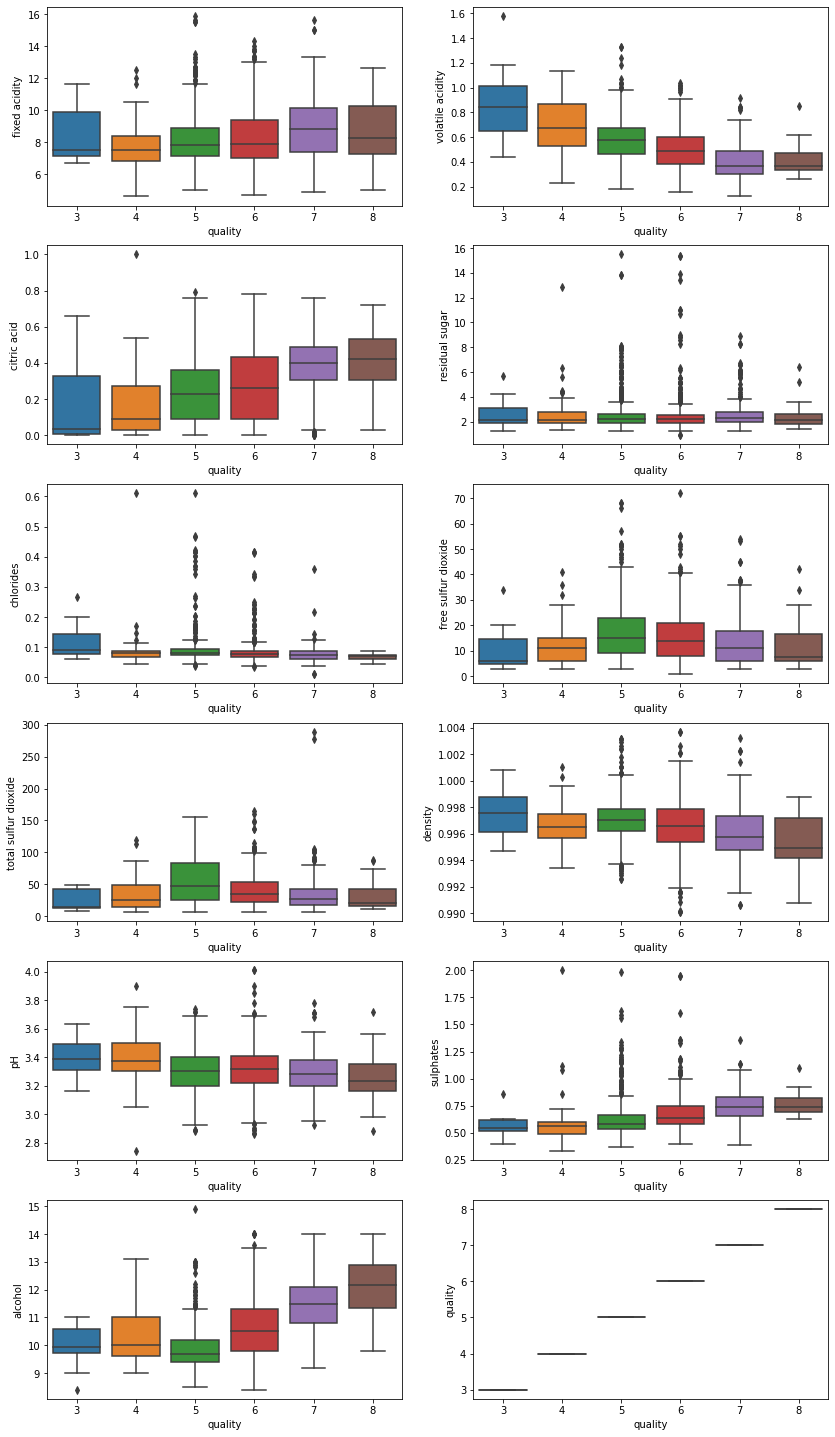

In [ ]:
L=[7,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,30))

for x in data:
  plt.subplot(a,b,c)
  sns.boxplot(data['quality'],data[x])
  c=c+1

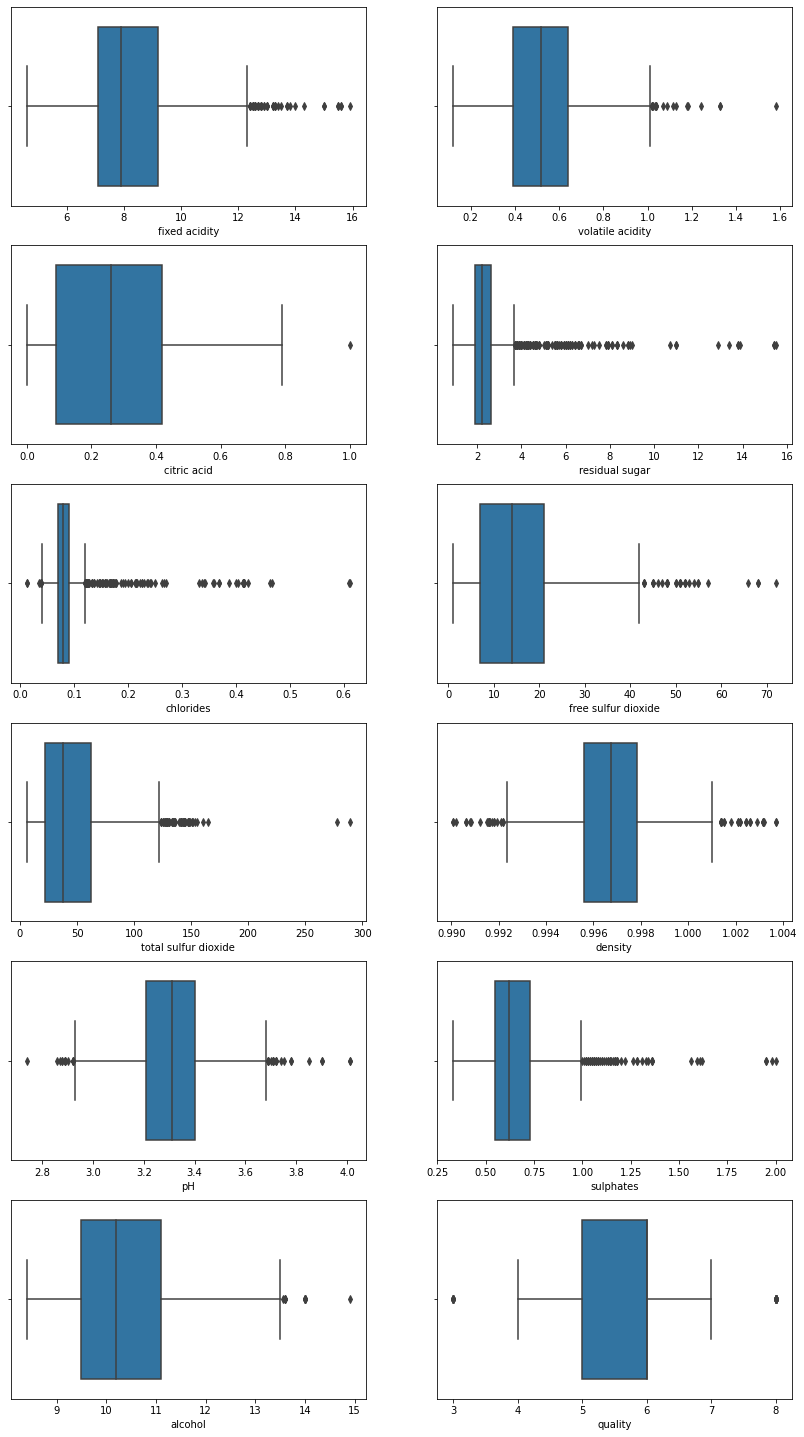

In [ ]:
L=[7,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,30))

for x in data:
  plt.subplot(a,b,c)
  sns.boxplot(data[x])
  c=c+1

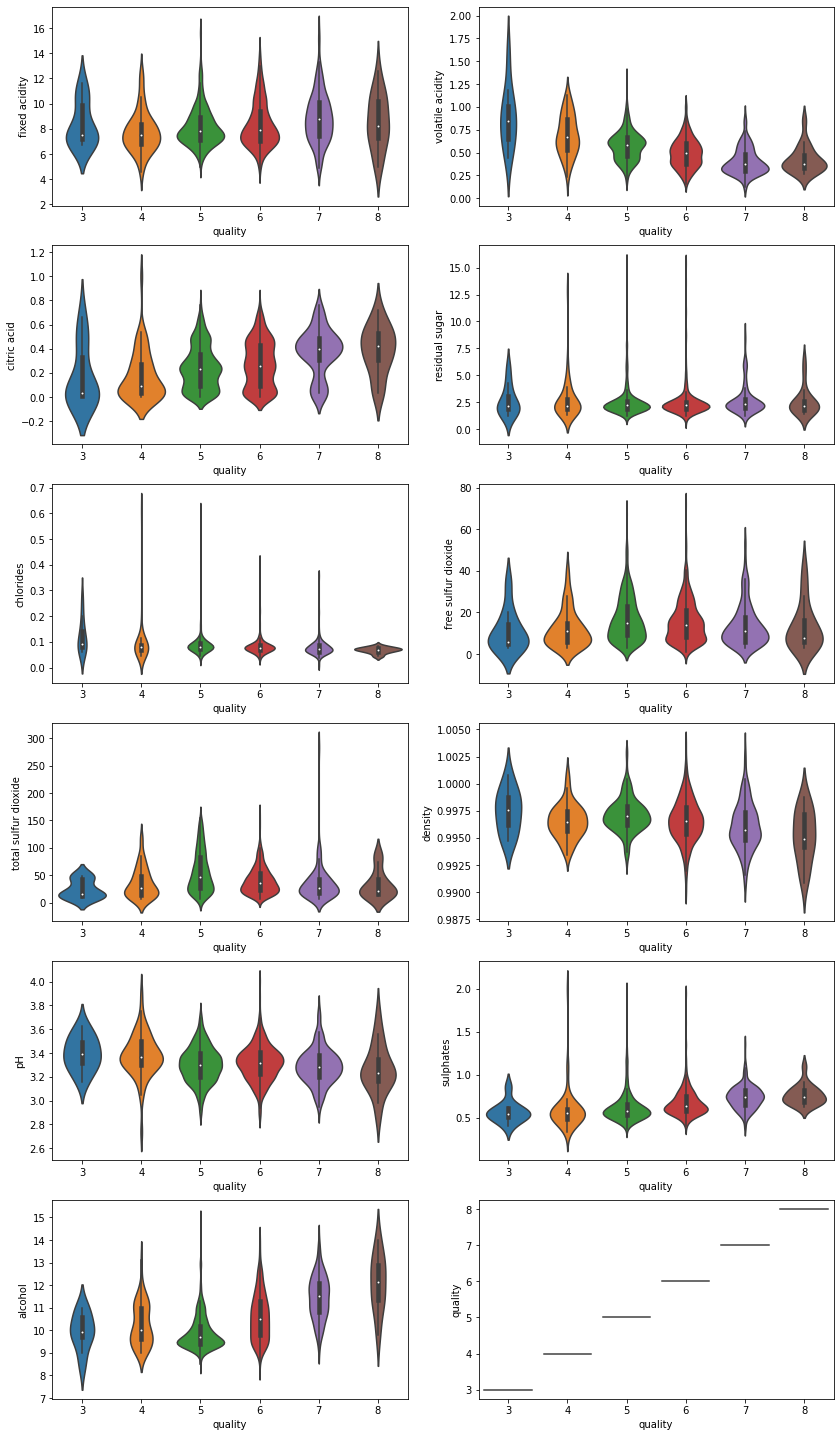

In [ ]:
L=[7,2,1]
a,b,c=L
fig=plt.figure(figsize=(14,30))

for x in data:
  plt.subplot(a,b,c)
  sns.violinplot(data['quality'],data[x])
  c=c+1

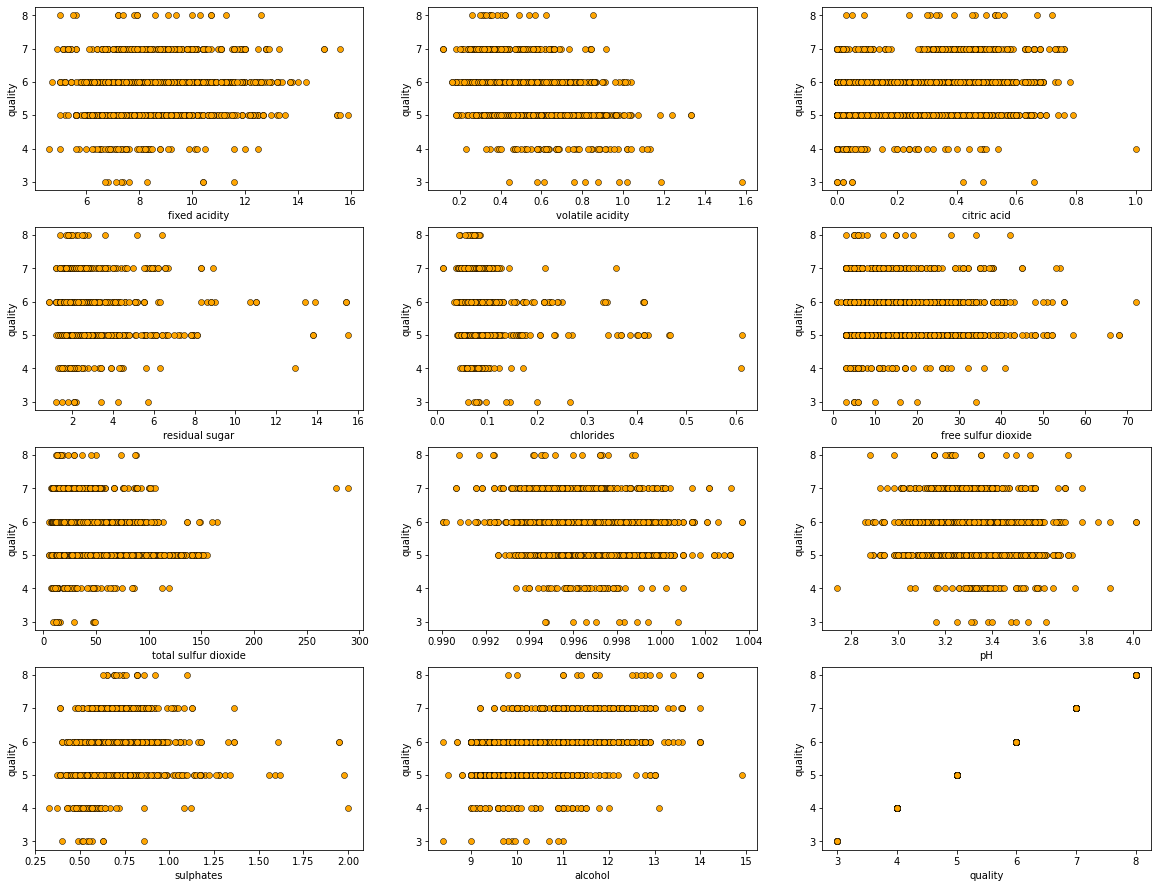

In [ ]:

L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,60))
for x in data:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['quality'],color="orange",edgecolor='k')
  
  c=c+1

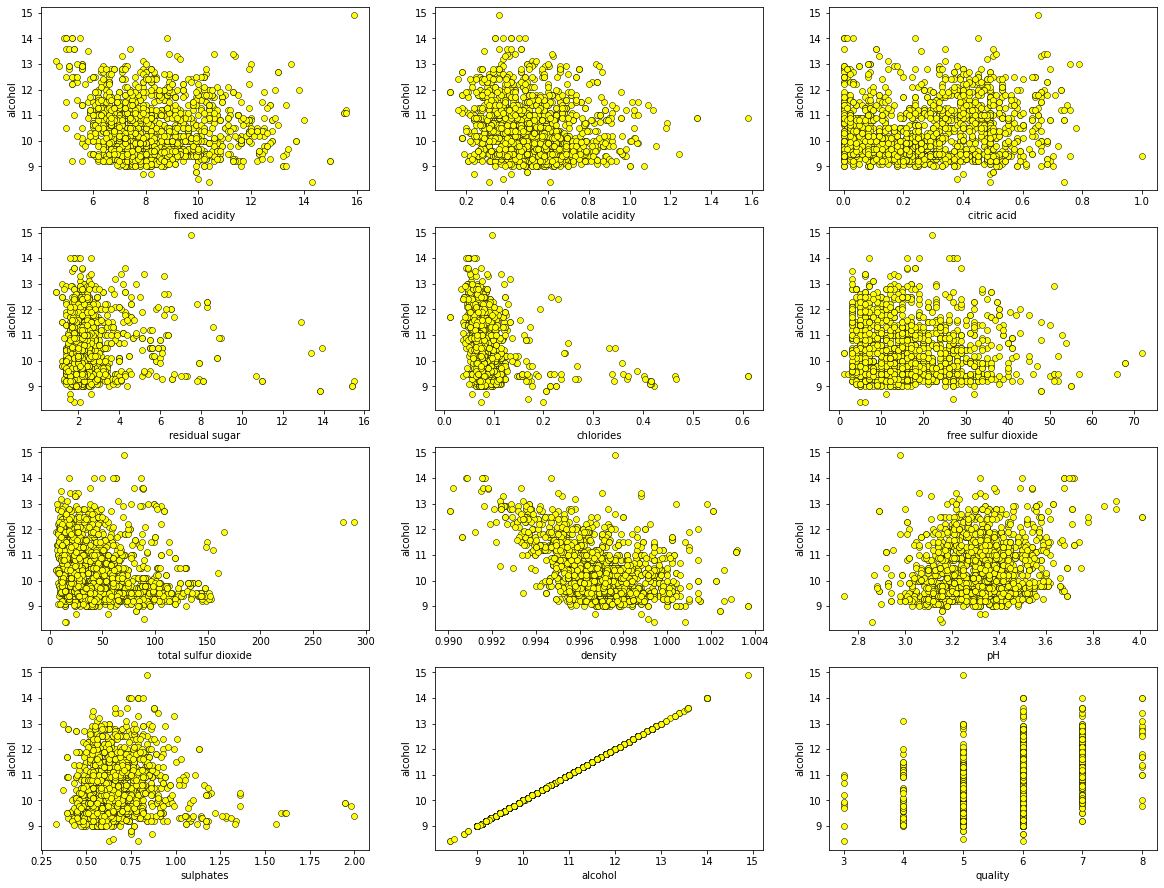

In [ ]:
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,60))
for x in data:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['alcohol'],color="yellow",edgecolor='k')
  
  c=c+1

In [ ]:
A=[]
for x in data:
  A.append(x)
print(A)
import random
random.shuffle(A)
print(A)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
['quality', 'alcohol', 'citric acid', 'fixed acidity', 'free sulfur dioxide', 'volatile acidity', 'density', 'chlorides', 'residual sugar', 'total sulfur dioxide', 'sulphates', 'pH']


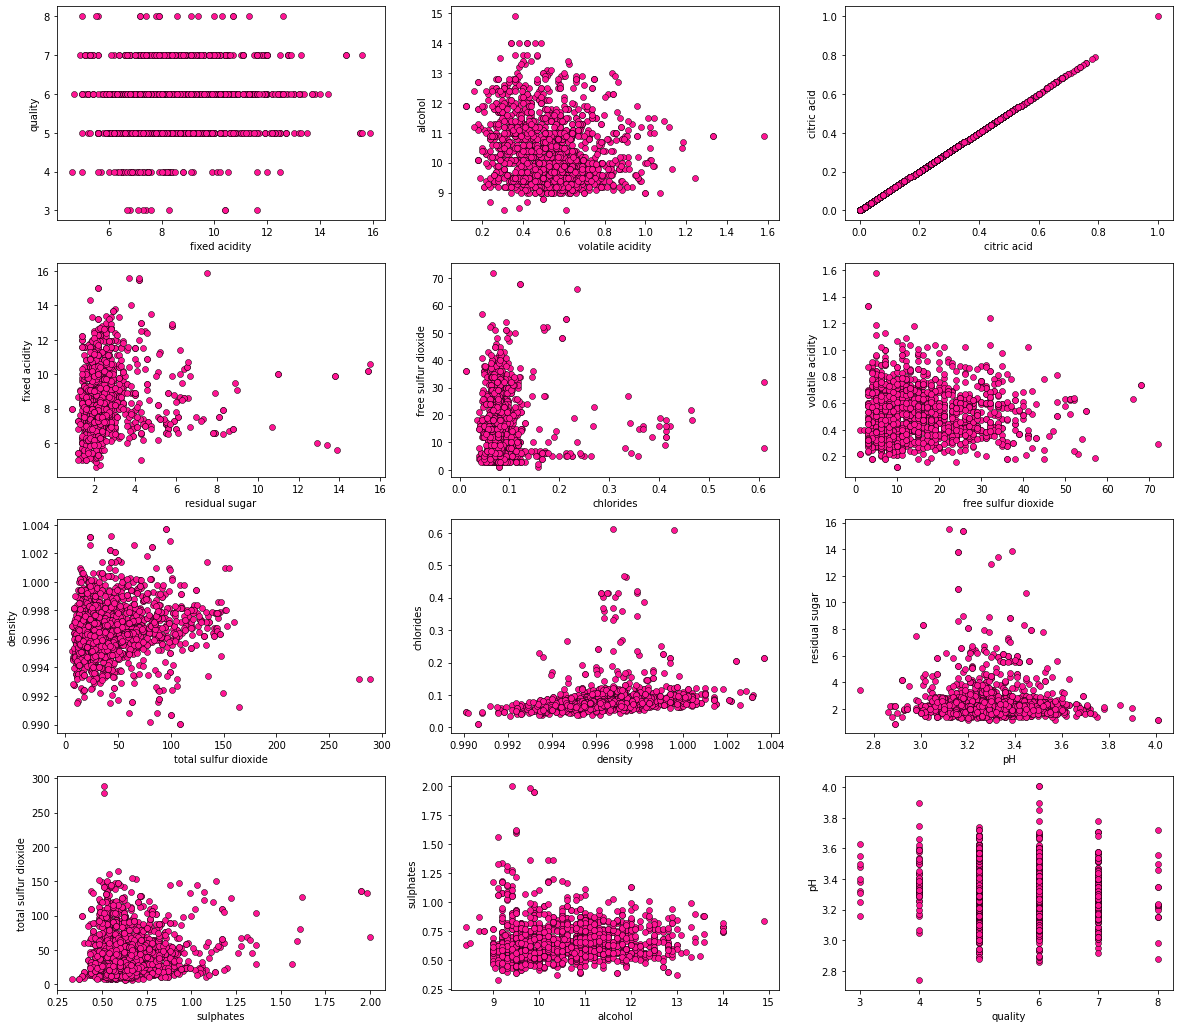

In [ ]:
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,70))
for x,y in zip(data,A):
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data[y],color="deeppink",edgecolor="k")
  
  c=c+1

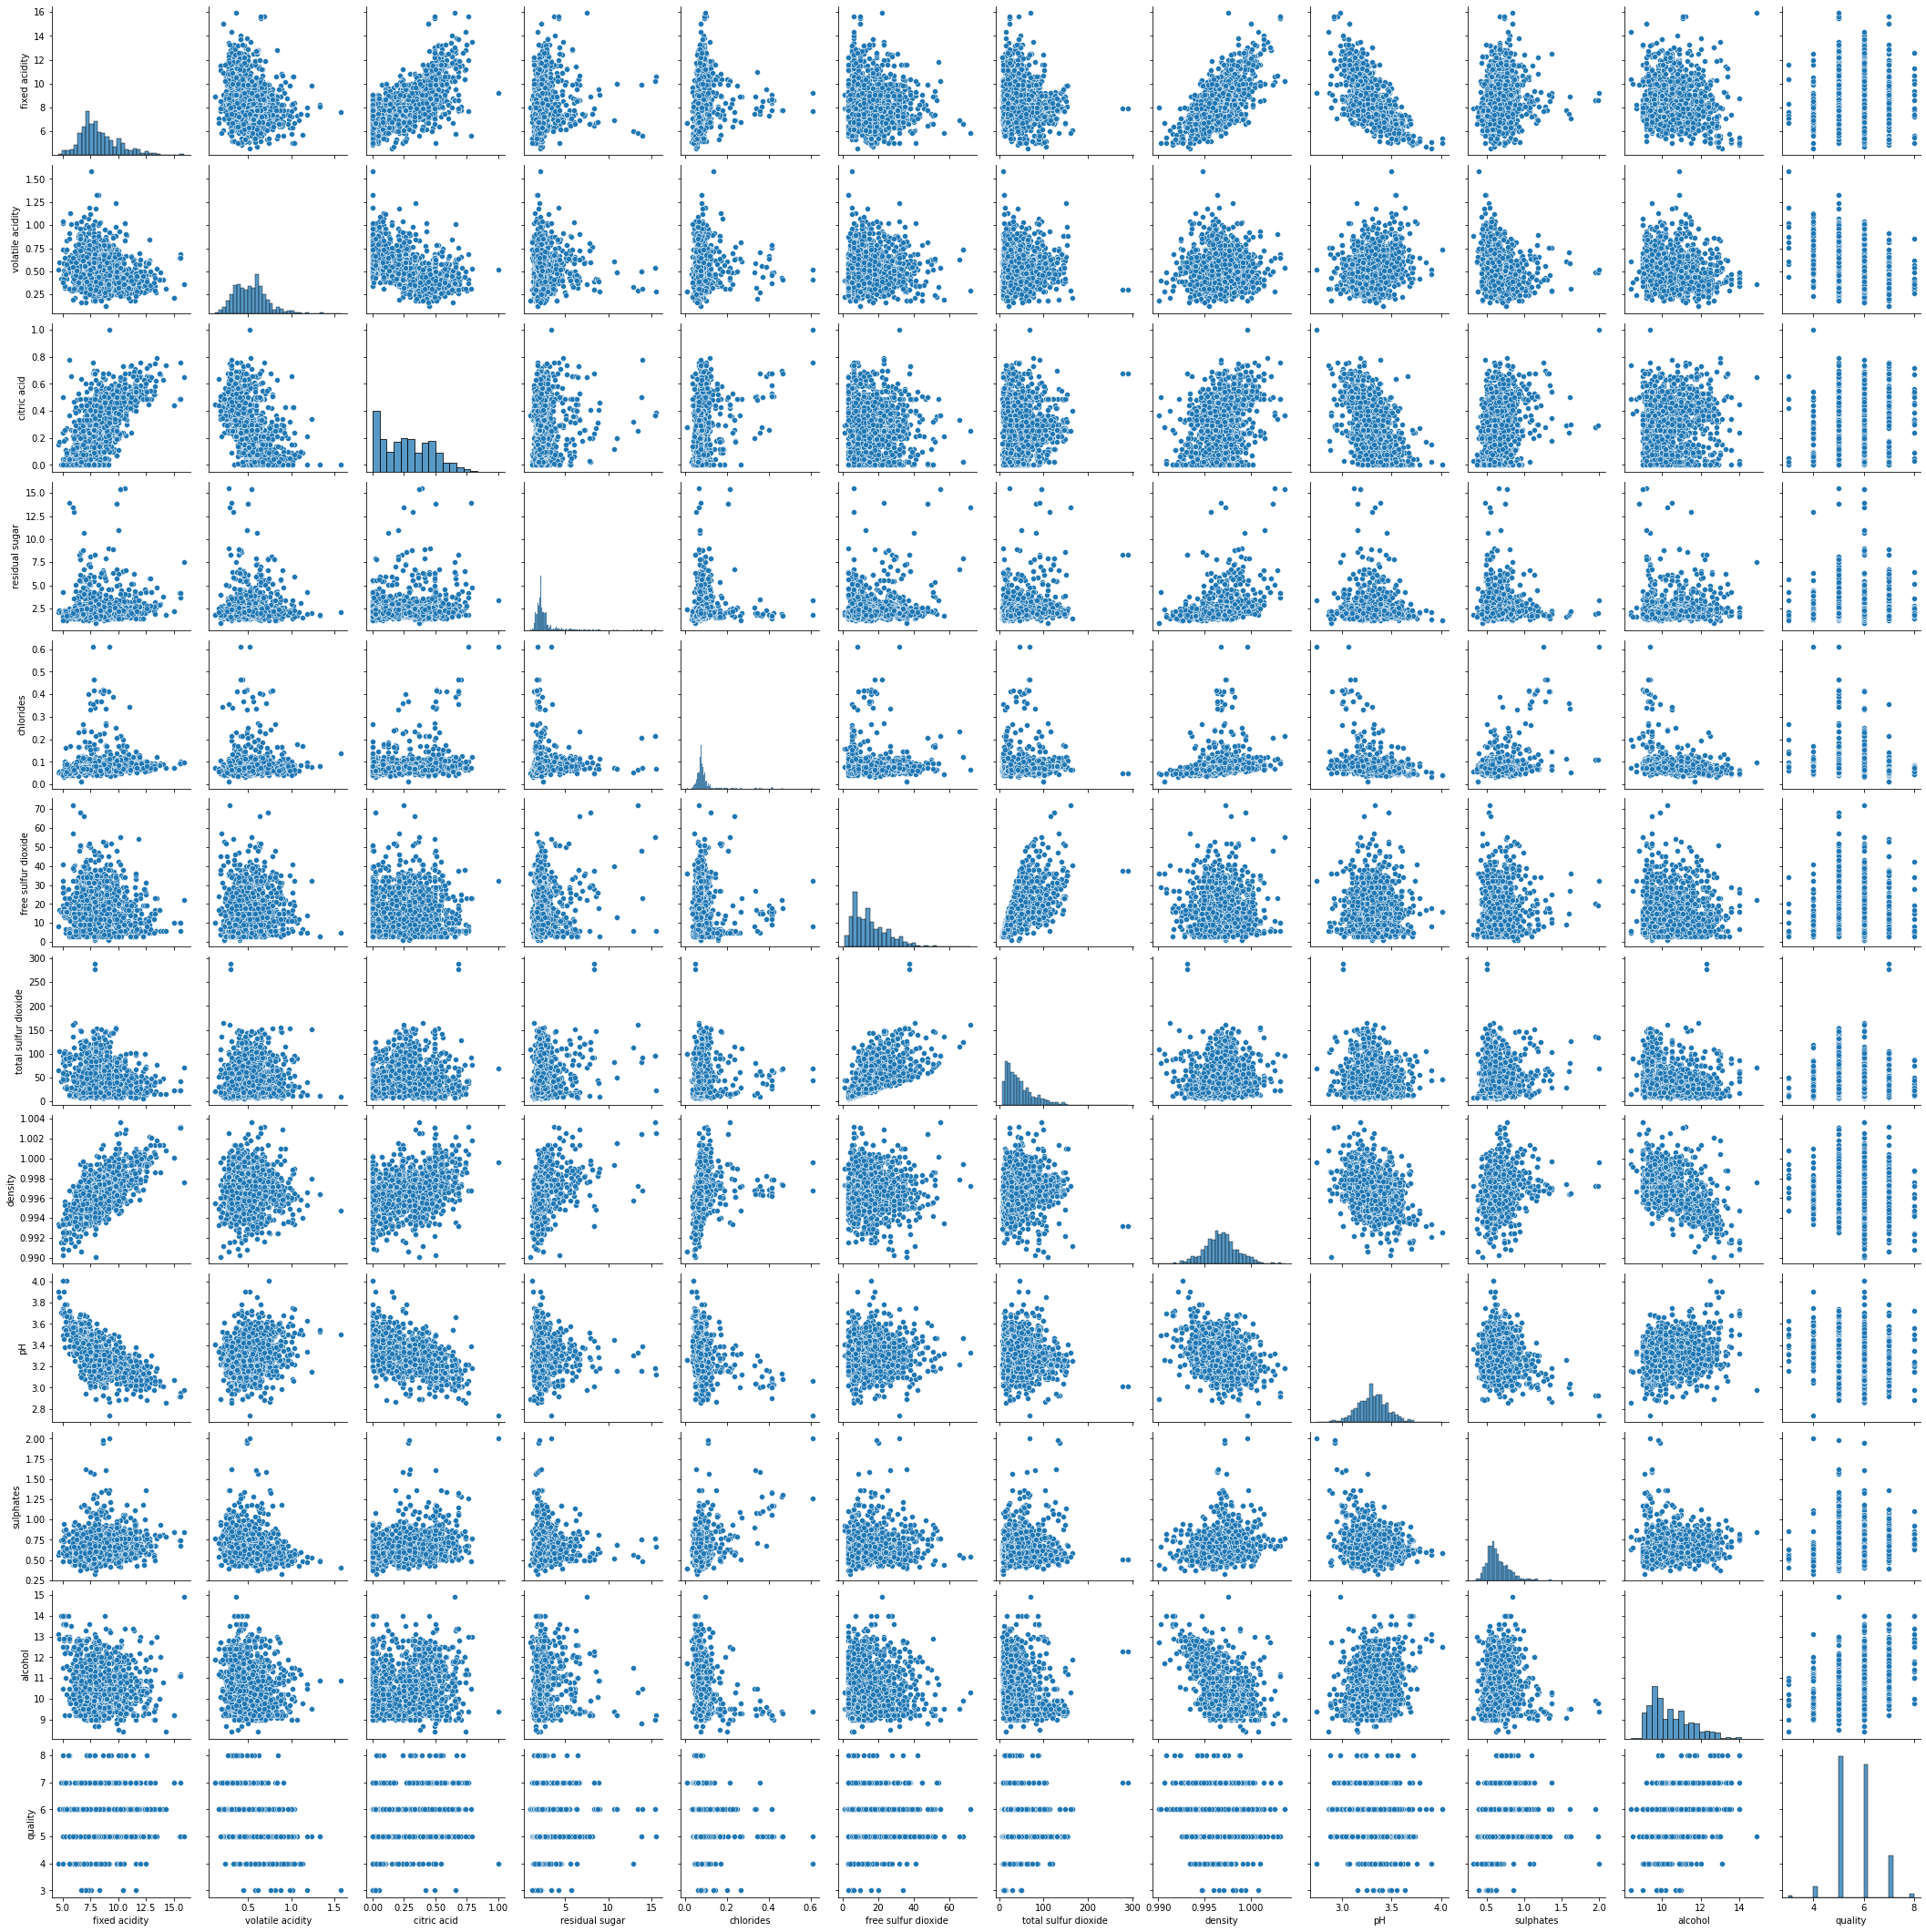

In [ ]:
sns.pairplot(data)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


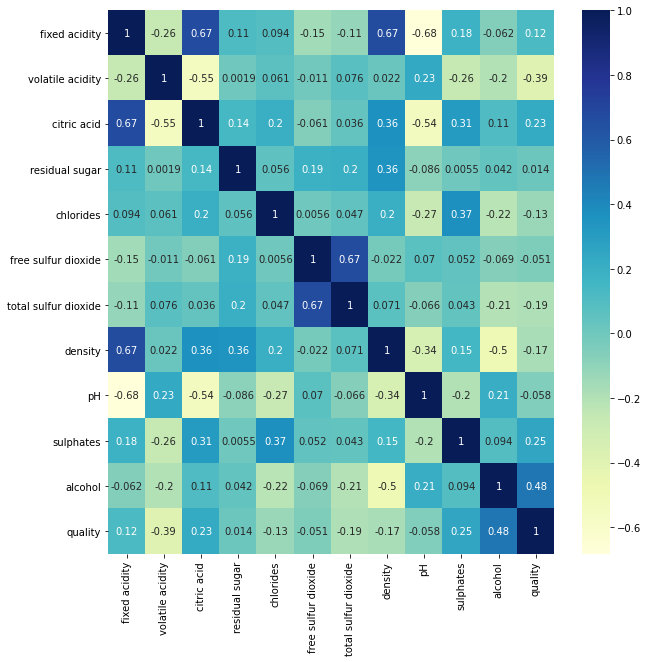

In [ ]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr ,cmap="YlGnBu",annot=True)

In [ ]:
#Trying to find the columns which has more correlation greater than 0.5 with saleprice.
num_data_corr=data.corr()['quality'][:-1]
good_corr_fea_list=num_data_corr[abs(num_data_corr)<1].sort_values(ascending=False)
print("There are {} strongly correlated values with Saleprice:\n{}".format(len(good_corr_fea_list),good_corr_fea_list))

There are 11 strongly correlated values with Saleprice:
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


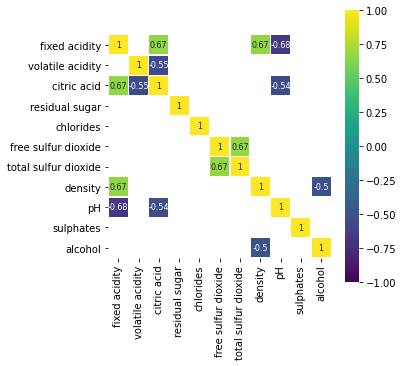

In [ ]:
#Feature to Feature Relationships using heatmap
fea_corr=data.drop('quality',axis=1).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(fea_corr[(fea_corr>=0.5)|(fea_corr<=-0.4)],
              cmap='viridis',vmax=1.0,vmin=-1.0, linewidths= 0.4,
                 annot=True,annot_kws={"size":8},square=True) ; 

In [ ]:
for x in range (len(data.corr().columns)):
  for y in range(x):
    if abs(data.corr().iloc[x,y])>0.6:
      name=data.corr().columns[x]
      print(name)

citric acid
total sulfur dioxide
density
pH


In [ ]:
data.drop(["total sulfur dioxide","density"],axis=1,inplace=True)

In [ ]:
df=data.iloc[:,:-1]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2


In [ ]:
for i in df:
  Q25=df[i].quantile(0.25)
  Q75=df[i].quantile(0.75)
  IQR=Q75-Q25
  min_limit=Q25-1.5*IQR
  max_limit=Q75+1.5*IQR
  outliers1=[x for x in df[i] if x < min_limit or x > max_limit]
  median=np.median(df[i])
  df[i]=df[i].replace(outliers1,max_limit)

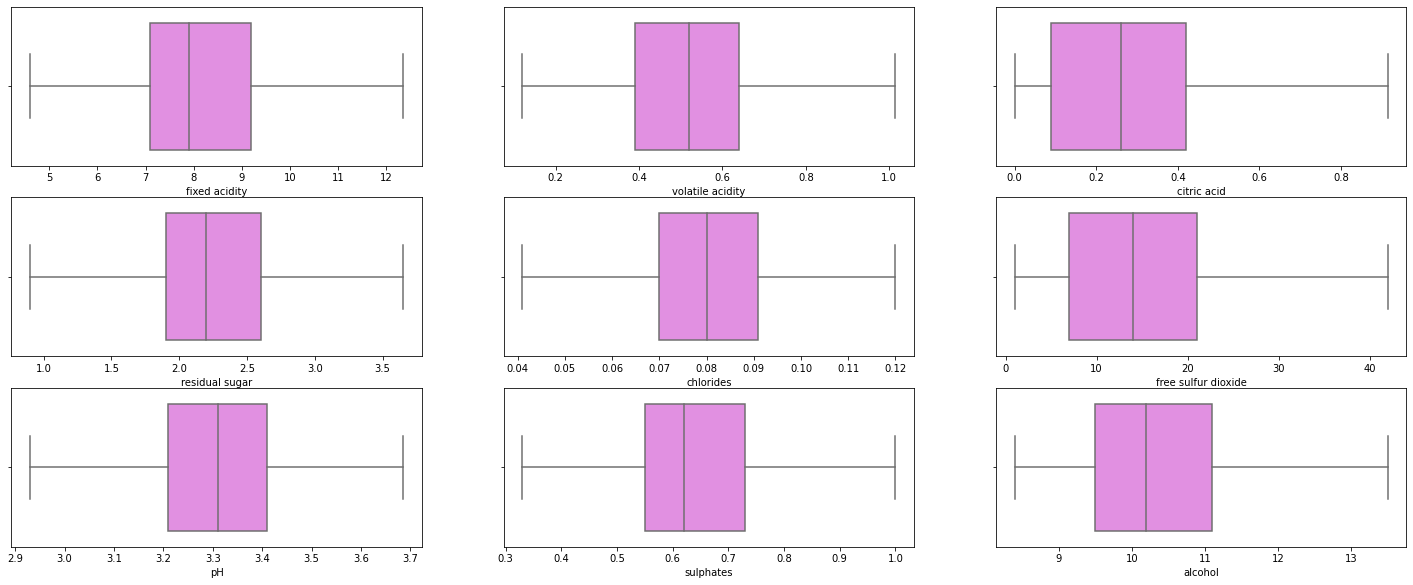

In [ ]:
L=[13,3,1]
a,b,c=L
fig=plt.figure(figsize=(25,45))
for x in df:
  plt.subplot(a,b,c)
  sns.boxplot(df[x],color="violet")
  c=c+1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
model_max=MinMaxScaler()
print(model_max.fit(df))
print(model_max.data_max_)
data1=model_max.transform(df)
data1
scaled_data=pd.DataFrame(data1, columns = df.columns)
scaled_data


MinMaxScaler(copy=True, feature_range=(0, 1))
[12.35   1.015  0.915  3.65   0.12  42.     3.685  1.    13.5  ]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
0,0.361290,0.648045,0.000000,0.363636,0.443038,0.243902,0.768212,0.343284,0.196078
1,0.412903,0.849162,0.000000,0.618182,0.721519,0.585366,0.357616,0.522388,0.274510
2,0.412903,0.715084,0.043716,0.509091,0.645570,0.341463,0.437086,0.477612,0.274510
3,0.851613,0.178771,0.612022,0.363636,0.430380,0.390244,0.304636,0.373134,0.274510
4,0.361290,0.648045,0.000000,0.363636,0.443038,0.243902,0.768212,0.343284,0.196078
...,...,...,...,...,...,...,...,...,...
1594,0.206452,0.536313,0.087432,0.400000,0.620253,0.756098,0.688742,0.373134,0.411765
1595,0.167742,0.480447,0.109290,0.472727,0.265823,0.926829,0.781457,0.641791,0.549020
1596,0.219355,0.435754,0.142077,0.509091,0.443038,0.682927,0.649007,0.626866,0.509804
1597,0.167742,0.586592,0.131148,0.400000,0.430380,0.756098,0.847682,0.567164,0.352941


In [ ]:
x=scaled_data.copy()
y=data[['quality']]




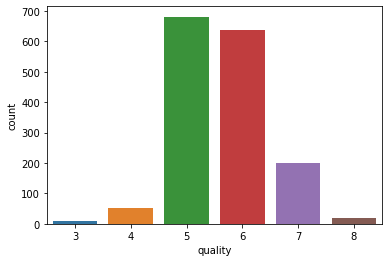

In [ ]:
sns.countplot(data['quality'])

In [ ]:
data['quality']=data['quality'].map({3:'bad',4:'bad',5:'bad',6:'good',7:'good',8:'good'})
data['quality'].unique()

array(['bad', 'good'], dtype=object)

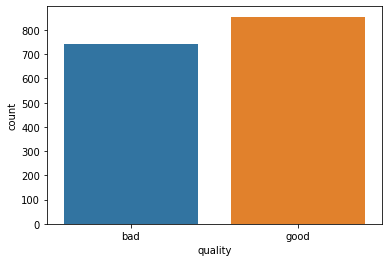

In [ ]:
sns.countplot(data['quality'])

In [ ]:

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['quality']=label.fit_transform(data['quality'])

In [ ]:
X=scaled_data.copy()
Y=data[['quality']]

In [ ]:
Y

,quality
0,0
1,0
2,0
3,1
4,0
...,...
1594,0
1595,1
1596,1
1597,0


In [ ]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((1071, 9), (528, 9), (528, 1), (1071, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
log_predict = model_log.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,log_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=log_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=log_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=log_predict))

accuracy score :
 0.7329545454545454
Confusion matrix :
 [[178  60]
 [ 81 209]]
Recall score:
 0.7206896551724138
Precision score:
 0.7769516728624535
f1 score:
 0.7477638640429337


In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
gb_predict=model_gb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,gb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=gb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=gb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=gb_predict))

accuracy score :
 0.7727272727272727
Confusion matrix :
 [[183  55]
 [ 65 225]]
Recall score:
 0.7758620689655172
Precision score:
 0.8035714285714286
f1 score:
 0.7894736842105263


In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()
model_ab.fit(x_train,y_train)
ab_predict=model_ab.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,ab_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=ab_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=ab_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=ab_predict))

accuracy score :
 0.7462121212121212
Confusion matrix :
 [[172  66]
 [ 68 222]]
Recall score:
 0.7655172413793103
Precision score:
 0.7708333333333334
f1 score:
 0.7681660899653979


In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,xgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=xgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=xgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=xgb_predict))


accuracy score :
 0.7727272727272727
Confusion matrix :
 [[186  52]
 [ 68 222]]
Recall score:
 0.7655172413793103
Precision score:
 0.8102189781021898
f1 score:
 0.7872340425531915


In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,lgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=lgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=lgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=lgb_predict))

accuracy score :
 0.7859848484848485
Confusion matrix :
 [[180  58]
 [ 55 235]]
Recall score:
 0.8103448275862069
Precision score:
 0.8020477815699659
f1 score:
 0.8061749571183533


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,RF_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=RF_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=RF_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=RF_predict))

accuracy score :
 0.7954545454545454
Confusion matrix :
 [[182  56]
 [ 52 238]]
Recall score:
 0.8206896551724138
Precision score:
 0.8095238095238095
f1 score:
 0.8150684931506851


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,DT_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=DT_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=DT_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=DT_predict))

accuracy score :
 0.7329545454545454
Confusion matrix :
 [[161  77]
 [ 64 226]]
Recall score:
 0.7793103448275862
Precision score:
 0.7458745874587459
f1 score:
 0.7622259696458685


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(metric='euclidean')
model_KNN.fit(x_train,y_train)
KNN_predict=model_KNN.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,KNN_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=KNN_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=KNN_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=KNN_predict))

accuracy score :
 0.7140151515151515
Confusion matrix :
 [[156  82]
 [ 69 221]]
Recall score:
 0.7620689655172413
Precision score:
 0.7293729372937293
f1 score:
 0.7453625632377741


In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier()
model_sgd.fit(x_train,y_train)
sgd_predict=model_sgd.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=sgd_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,sgd_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=sgd_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=sgd_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=sgd_predict))

accuracy score :
 0.7291666666666666
Confusion matrix :
 [[181  57]
 [ 86 204]]
Recall score:
 0.7034482758620689
Precision score:
 0.7816091954022989
f1 score:
 0.7404718693284937
